# Regularization in Deep Learning

## Part 1 - Data Analysis

In [92]:
##load dataset

from sklearn.datasets import make_moons
from matplotlib import pyplot
import pandas as pd
import numpy as np



## sklearn make_moons creates a dataset containing two half moons labeled as 0,1
## All the ponits of each half moon is a 2d coordinate (x,y) 
X,y = make_moons(n_samples=100,noise=0.2,random_state=1)

In [93]:
## see the data

print(X.shape)
print(y.shape)
print('features are i.e X: ',X)
print('classes are i.e. y: ',y)

(100, 2)
(100,)
features are i.e X:  [[ 1.36698238 -0.23541584]
 [ 1.76404402 -0.34563288]
 [-0.37868174  0.41004375]
 [ 1.15113747 -0.13597622]
 [ 2.31168314  0.32295125]
 [ 0.53866045  0.73704603]
 [-0.93583639  1.00686001]
 [ 1.32563024 -0.13540284]
 [ 0.75398022 -0.37261326]
 [ 0.42764536 -0.38163078]
 [ 1.86426147 -0.04447877]
 [-0.83255618  0.71258899]
 [ 0.22507434  0.27186939]
 [ 0.21098847  0.2244366 ]
 [ 0.05359594  0.20843943]
 [-0.14691002  0.85157719]
 [-0.75060111  0.86559773]
 [-0.91043983  0.56466749]
 [ 1.21265683 -0.6289975 ]
 [ 0.64660318  0.72011433]
 [ 0.68237381  0.08692362]
 [ 0.61031853 -0.48706856]
 [ 1.99715631  0.24389764]
 [ 0.2077874  -0.42914145]
 [ 0.35027414  0.74199317]
 [-0.68407286  0.66774772]
 [ 1.76290471  0.02997561]
 [-0.13029538  0.8163553 ]
 [-1.34872432 -0.03686236]
 [-0.879935    0.82462905]
 [ 0.69322932 -0.08679283]
 [ 2.30858186  0.41045366]
 [-0.32283333 -0.11202163]
 [ 1.76628178  0.16627015]
 [ 1.86869763  0.11172855]
 [-0.81925203  0.4

In [94]:
## creating a dictionary having three elements. x,y,label below are keys. the values being assigned are values.
## each of these key value pairs becomes a column each  when we make a pandas dataframe out of python dictionary 

df = pd.DataFrame(dict(x = X[:,0],y = X[:,1],label = y))

key is : 0
group for the key is :
           x         y  label
2  -0.378682  0.410044      0
5   0.538660  0.737046      0
6  -0.935836  1.006860      0
11 -0.832556  0.712589      0
15 -0.146910  0.851577      0
16 -0.750601  0.865598      0
17 -0.910440  0.564667      0
19  0.646603  0.720114      0
20  0.682374  0.086924      0
24  0.350274  0.741993      0
25 -0.684073  0.667748      0
27 -0.130295  0.816355      0
28 -1.348724 -0.036862      0
29 -0.879935  0.824629      0
35 -0.819252  0.488901      0
36 -1.077088 -0.078416      0
38 -0.002759  0.967090      0
39 -0.747051  1.029547      0
43  0.916871  0.335778      0
45 -0.886625  0.659136      0
46 -0.893815  0.151396      0
48  0.138719  1.048310      0
50 -0.891858  0.726854      0
52 -0.107132  1.355214      0
53  1.150273  0.416804      0
55 -1.040694  0.084433      0
56  0.493898  0.932683      0
58  0.962456  0.130055      0
60 -0.350309  0.878914      0
63 -0.697194  0.435509      0
64 -1.348620  0.184012      0
66  0.

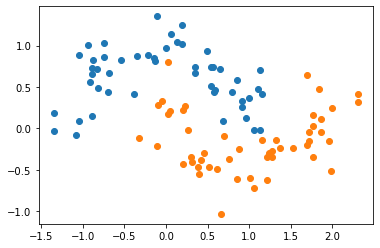

In [95]:
###lets visualize these two half moons
## drawing a scatter plot in loop . it creates a different color for the data drawn in each iteration of loop
## if we put pyplot.show() in the loop, it creates a separate plot for each iteration because everytime its called the existing plot will be shown

grouped = df.groupby('label')

for key,group in grouped:
    print('key is :',key)
    print('group for the key is :')
    print(group)
    pyplot.scatter(group.x,group.y)

pyplot.show() # plot gets drawn by default at the end of loop(not at each iteration) if we dont call this


### It can be seen that data plotted in two different colors is two half moons

### This data can't be separated by using a linear classifier(without any transformations of input data). So this data seems a good dataset for fitting a neural network


## Part 2 - Multi Layer Perceptron without Regularization to demo overfitting

In [96]:
'''
lets build a Multi Layer Perceptron and demo regualrization.

To demo regularization use, lets first fit a unregualrized model which overfits
'''

'\nlets build a Multi Layer Perceptron and demo regualrization.\n\nTo demo regularization use, lets first fit a unregualrized model which overfits\n'

In [97]:
### The data has two class labels : 0,1
###Lets develop a Multi Layer perceptron model to fit this binary classification problem.

## generate 2d classification dataset

X,y = make_moons(n_samples = 100, noise=0.2,random_state=1) # same dataset as visualized above. just recreating it.

## split into train and test data

# no. of samples for training. our goal is to overfit the model to demo regualrization use.selecting small subset of data.
n_train = 30

## lets first split input features i.e coordinates
train_X,test_X = X[:n_train,:],X[n_train:,:]

## split lables
train_y,test_y = y[:n_train],y[n_train:]

print('train data shape is : ',train_X.shape,train_y.shape)
print('test_data shape is : ',test_X.shape,test_y.shape)


train data shape is :  (30, 2) (30,)
test_data shape is :  (70, 2) (70,)


In [98]:
## Lets define a model with one hidden layer containing 500 nodes and the rectified linear activation function
## Lets define model output layer with a single node with sigmoid activation function to predict 0,1.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='feed_forward_model_1')
model.add(Dense(500,input_dim = 2,activation='relu',name='hidden_dense_layer_1_with_relu'))
model.add(Dense(1,activation='sigmoid',name='output_dense_layer_with_sigmoid'))
print(model.summary())

Model: "feed_forward_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_dense_layer_1_with_re (None, 500)               1500      
_________________________________________________________________
output_dense_layer_with_sigm (None, 1)                 501       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
## Now we have model defined. Lets specify the loss function to optimize on ,optimizer and metrics we want to see

model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [100]:
##fit model

model.fit(train_X,train_y,epochs=4000,verbose=0)

In [101]:

##Lets evaluate the fitted model

train_acc = model.evaluate(train_X,train_y,verbose=1)
test_acc = model.evaluate(test_X,test_y,verbose=1)

print('train loss , accuracy is : ',train_acc)
print('test loss , accuracy is : ',test_acc)


70/70 [==============================] - 0s 53us/sample - loss: 0.5004 - acc: 0.9143
train loss , accuracy is :  [0.0001967634743778035, 1.0]
test loss , accuracy is :  [0.5004375383790051, 0.9142857]


### we can see that training accuracy is much better than test accuracy. a possible sign of overfitting.

### Lets fit again. this time let us plot the train and validation accuracies during training. If the model overfits we will be able to see initally accuracy improves for both train and validation data but later validation accuracy starts degrading while train accuracy improves




In [102]:

## Lets refit the model from start

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='feed_forward_model_1')
model.add(Dense(500,input_dim = 2,activation='relu',name='hidden_dense_layer_1_with_relu'))
model.add(Dense(1,activation='sigmoid',name='output_dense_layer_with_sigmoid'))
print(model.summary())


model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_history = model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=4000,verbose=0)





Model: "feed_forward_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_dense_layer_1_with_re (None, 500)               1500      
_________________________________________________________________
output_dense_layer_with_sigm (None, 1)                 501       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
None


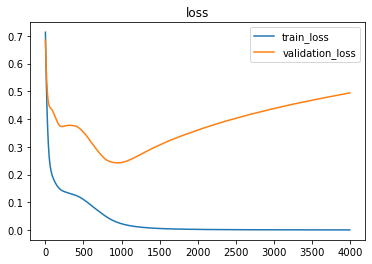

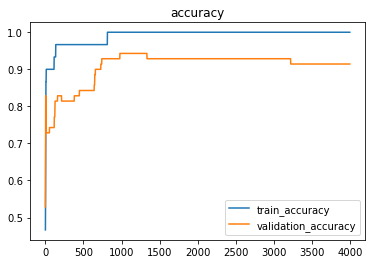

In [103]:
## lets plot and see how loss and accuracy changes over epochs while training model

pyplot.plot(model_history.history['loss'],label='train_loss')
pyplot.plot(model_history.history['val_loss'],label='validation_loss')
pyplot.legend()
pyplot.title('loss')
pyplot.show()


pyplot.plot(model_history.history['acc'],label='train_accuracy')
pyplot.plot(model_history.history['val_acc'],label='validation_accuracy')
pyplot.legend()
pyplot.title('accuracy')
pyplot.show()


### We can see that the model loss for validation data starts incrceasing after some time while loss of training data kept decreasing. 

### Similarly accuracy of training data started improving and became closer to 1 , while validatoin data accuracy started to degrade after sometime.


## Part 3 - Multi Layer Perceptron with Regularization to prevent overfitting

In [104]:

## Lets refit the model from start

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

model = Sequential(name='feed_forward_model_1')

## adding 'L2' kernel regularizer to the dense hidden layer. This regularizes output of nodes
model.add(Dense(500,input_dim = 2,activation='relu',kernel_regularizer = l2(0.001),name='hidden_dense_layer_1_with_relu'))
model.add(Dense(1,activation='sigmoid',name='output_dense_layer_with_sigmoid'))
print(model.summary())


model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=4000,verbose=0)


train_acc = model.evaluate(train_X,train_y,verbose=1)
test_acc = model.evaluate(test_X,test_y,verbose=1)

print('train loss , accuracy is : ',train_acc)
print('test loss , accuracy is : ',test_acc)


Model: "feed_forward_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_dense_layer_1_with_re (None, 500)               1500      
_________________________________________________________________
output_dense_layer_with_sigm (None, 1)                 501       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
None
70/70 [==============================] - 0s 88us/sample - loss: 0.2783 - acc: 0.9429
train loss , accuracy is :  [0.0155413169413805, 1.0]
test loss , accuracy is :  [0.2782659549798284, 0.94285715]


### When compared to model without regularizer earlier we can see that accuracy on test data has improved by 3% . i.e from 91% to 94%

In [105]:

## Lets refit the model from start to see the plots.
## This time instead of accuracy increasing and decreasing durining training it should continulaly increase

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

model = Sequential(name='feed_forward_model_1')

## adding kernel regularizer to the dense hidden layer. This regularizes output of nodes
model.add(Dense(500,input_dim = 2,activation='relu',kernel_regularizer = l2(0.001),name='hidden_dense_layer_1_with_relu'))
model.add(Dense(1,activation='sigmoid',name='output_dense_layer_with_sigmoid'))
print(model.summary())


model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model_history = model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=4000,verbose=0)

Model: "feed_forward_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_dense_layer_1_with_re (None, 500)               1500      
_________________________________________________________________
output_dense_layer_with_sigm (None, 1)                 501       
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
None


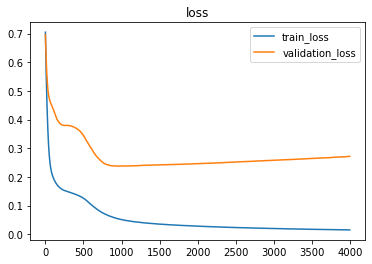

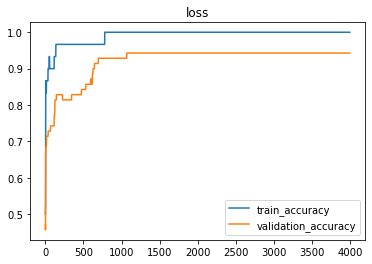

In [106]:
pyplot.plot(model_history.history['loss'],label='train_loss')
pyplot.plot(model_history.history['val_loss'],label='validation_loss')
pyplot.title('loss')
pyplot.legend()
pyplot.show()

pyplot.plot(model_history.history['acc'],label='train_accuracy')
pyplot.plot(model_history.history['val_acc'],label='validation_accuracy')
pyplot.title('loss')
pyplot.legend()
pyplot.show()

### We can see that accuracy plot is continually increasing instead of increasing and then decreasing.

### similarly loss on validation data has decreased and although there is a slight increase even now it didn't shoot up as much as in model without regularization.


### Since it is evident now that weight regularization has improved model accuracy, let's try to identify better hyper paramater value which gives better accuracy.

## Part 4 - MLP with regularization and grid search for hyper-paramater tuning

In [107]:

# grid search values for hyperparamter regularization constant
# first let's test different levels of hyper paramater values to see which level works better for this problem

param_values = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]


from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2


# data preparation
X,y = make_moons(n_samples=100,noise=0.2,random_state=1)
n_train = 30

X_train,X_test = X[:n_train,:],X[n_train:,:]
y_train,y_test = y[:n_train],y[n_train:]



for param_value in param_values:
    # define model

    model = Sequential(name='MLP')
    model.add(Dense(500,input_dim=2,activation ='relu',kernel_regularizer = l2(param_value),name='h1'))
    model.add(Dense(1,name = 'output'))
    model.compile(loss=['binary_crossentropy'],optimizer='adam',metrics=['accuracy'])
    
    # fit model
    model.fit(X_train,y_train,epochs=4000,verbose=0) # not prinitng verbose as it will print a lot of info due to loop

    
    # evaluate the model
    train_loss,train_accuracy = model.evaluate(X_test,y_test,verbose=0)
    test_loss,test_accuracy = model.evaluate(X_test,y_test,verbose=0)

    print('Param_Value : %f Train_loss : %f Test_loss  : %f Train accuracy : %f Test accuracy  : %f '%(param_value,train_loss,test_loss,train_accuracy,test_accuracy))



Param_Value : 0.100000 Train_loss : 0.389591 Test_loss  : 0.389591 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.010000 Train_loss : 0.354863 Test_loss  : 0.354863 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.001000 Train_loss : 0.338159 Test_loss  : 0.338159 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.000100 Train_loss : 0.359979 Test_loss  : 0.359979 Train accuracy : 0.885714 Test accuracy  : 0.885714 
Param_Value : 0.000010 Train_loss : 0.531733 Test_loss  : 0.531733 Train accuracy : 0.914286 Test accuracy  : 0.914286 
Param_Value : 0.000001 Train_loss : 7.492118 Test_loss  : 7.492118 Train accuracy : 0.514286 Test accuracy  : 0.514286 


### As we can see from results test data accuracy is best for parameter values : 0.01,0.001
### Among param values 0.01 and 0.001, test_loss is better at 0.001
### So we can conclude param values at the level of 0.001 are better. So, we can try to perform grid serach again around that level to finalize which param value to use as regularizaiton constant

In [108]:

# grid search values for hyperparamter regularization constant
# let's test for values around 0.001 for hyper paramater to see values works better for this problem

import numpy as np

param_values_1 = np.linspace(0.01,0.09,9)
param_values_2 = np.linspace(0.001,0.009,9)
param_values = np.append(param_values_1,param_values_2)


from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2


# data preparation
X,y = make_moons(n_samples=100,noise=0.2,random_state=1)
n_train = 30

X_train,X_test = X[:n_train,:],X[n_train:,:]
y_train,y_test = y[:n_train],y[n_train:]



for param_value in param_values:
    # define model

    model = Sequential(name='MLP')
    model.add(Dense(500,input_dim=2,activation ='relu',kernel_regularizer = l2(param_value),name='h1'))
    model.add(Dense(1,name = 'output'))
    model.compile(loss=['binary_crossentropy'],optimizer='adam',metrics=['accuracy'])
    
    # fit model
    model.fit(X_train,y_train,epochs=4000,verbose=0) # not prinitng verbose as it will print a lot of info due to loop

    
    # evaluate the model
    train_loss,train_accuracy = model.evaluate(X_test,y_test,verbose=0)
    test_loss,test_accuracy = model.evaluate(X_test,y_test,verbose=0)

    print('Param_Value : %f Train_loss : %f Test_loss  : %f Train accuracy : %f Test accuracy  : %f '%(param_value,train_loss,test_loss,train_accuracy,test_accuracy))



Param_Value : 0.010000 Train_loss : 0.363466 Test_loss  : 0.363466 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.020000 Train_loss : 0.349295 Test_loss  : 0.349295 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.030000 Train_loss : 0.509602 Test_loss  : 0.509602 Train accuracy : 0.828571 Test accuracy  : 0.828571 
Param_Value : 0.040000 Train_loss : 0.364407 Test_loss  : 0.364407 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.050000 Train_loss : 7.492118 Test_loss  : 7.492118 Train accuracy : 0.514286 Test accuracy  : 0.514286 
Param_Value : 0.060000 Train_loss : 0.363302 Test_loss  : 0.363302 Train accuracy : 0.942857 Test accuracy  : 0.942857 
Param_Value : 0.070000 Train_loss : 7.492118 Test_loss  : 7.492118 Train accuracy : 0.514286 Test accuracy  : 0.514286 
Param_Value : 0.080000 Train_loss : 0.399935 Test_loss  : 0.399935 Train accuracy : 0.928571 Test accuracy  : 0.928571 
Param_Value : 0.090000 Train_loss : 0.37

### test accuracy seems to be very similar for values around .001. So, Let's conclude some value around 0.001 as best hyper paramater value.

### However, randomly for some param values , accuracy seems very bad. This tells there is some inconistency with model reusts. We can't assure  that same results will get generated if model is run twice.

### Figure out what is the cause.  Is this because of not initializing weights?